In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

In [2]:
#Store CSV into Dataframe

df = "./Resources/train.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#Changing Loan_Status column to Approved and Refused vs Y and N
train_df["Loan_Status"] = train_df["Loan_Status"].map(str)
train_df["Loan_Status"] = train_df["Loan_Status"].replace(['Y','N'],['Approved','Refused'])
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Approved
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Refused
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Approved
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Approved
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Approved


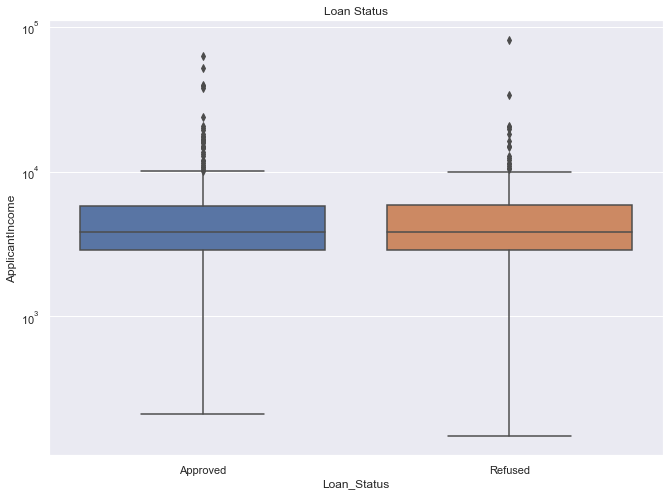

The median requested Applicant Income amount for approved contracts is 3812.5.
The median requested Applicant Income amount for refused contracts is  3833.5.


In [11]:
#Create boxplot for Loan status depends on Applicant Income

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'ApplicantIncome',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

#plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['ApplicantIncome'].median()
Refused_amount_median=Refused_loans['ApplicantIncome'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")


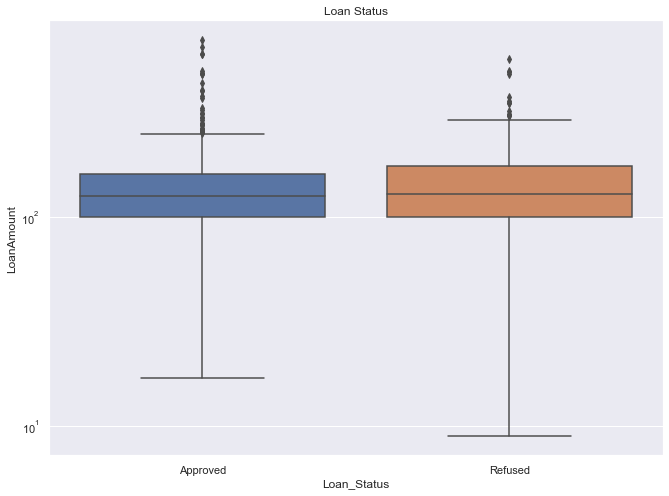

The median requested Applicant Income amount for approved contracts is 126.0.
The median requested Applicant Income amount for refused contracts is  129.0.


In [16]:
#Create boxplot for Loan status depends on Loan Amount

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'LoanAmount',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['LoanAmount'].median()
Refused_amount_median=Refused_loans['LoanAmount'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")


It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.


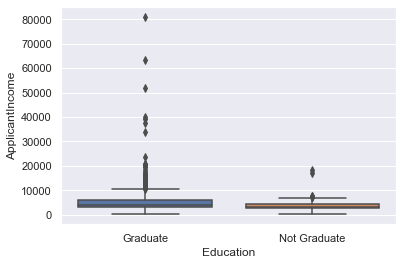

In [15]:
# Create Box plot using education level against the income

plt.figure(figsize=(11,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=train_df)

print(f"It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.")